In [37]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# URLs for the different interest rates
urls = {
    "federal_funds": "https://fred.stlouisfed.org/data/FEDFUNDS.txt",
    "1_year_treasury_bill": "https://fred.stlouisfed.org/data/GS1.txt",
    "10_year_treasury_constant_maturity": "https://fred.stlouisfed.org/data/GS10.txt"
}

# Function to download and parse data
def download_data(url):
    response = requests.get(url)
    response.raise_for_status()
    soup = BeautifulSoup(response.content, 'html.parser')
    text_content = soup.get_text()
    lines = text_content.splitlines()
    data_lines = []
    start_collecting = False
    for line in lines:
        if line.startswith("DATE"):
            start_collecting = True
            continue
        if start_collecting and line.strip():
            data_lines.append(line)
    data = [line.split() for line in data_lines]
    flat_data = [item[0] for item in data]
    values = flat_data[0::2]
    dates = flat_data[1::2]
    df = pd.DataFrame({
        'Date': pd.to_datetime(dates, errors='coerce'),
        'Value': pd.to_numeric(values, errors='coerce')
    })
    return df

# Download data for each rate
data_frames = {}
for rate, url in urls.items():
    data_frames[rate] = download_data(url)

# Filter for the past 10 years from today
ten_years_ago = datetime.now() - pd.DateOffset(years=10)
recent_data = {rate: df[df['Date'] >= ten_years_ago] for rate, df in data_frames.items()}

# a) Descriptive statistics
for rate, df in recent_data.items():
    print(f"Descriptive Statistics for {rate}:")
    print(df['Value'].describe())
    print("\n")


Descriptive Statistics for federal_funds:
count    119.000000
mean       1.796639
std        1.874870
min        0.050000
25%        0.130000
50%        1.160000
75%        2.405000
max        5.330000
Name: Value, dtype: float64


Descriptive Statistics for 1_year_treasury_bill:
count    119.000000
mean       1.971261
std        1.789965
min        0.050000
25%        0.375000
50%        1.530000
75%        2.860000
max        5.440000
Name: Value, dtype: float64


Descriptive Statistics for 10_year_treasury_constant_maturity:
count    119.000000
mean       2.486639
std        1.054729
min        0.620000
25%        1.735000
50%        2.320000
75%        3.130000
max        4.800000
Name: Value, dtype: float64




Descriptive Statistics for federal_funds:
count    119.000000
mean       1.796639
std        1.874870
min        0.050000
25%        0.130000
50%        1.160000
75%        2.405000
max        5.330000
Name: Value, dtype: float64


Descriptive Statistics for 1_year_treasury_bill:
count    119.000000
mean       1.971261
std        1.789965
min        0.050000
25%        0.375000
50%        1.530000
75%        2.860000
max        5.440000
Name: Value, dtype: float64


Descriptive Statistics for 10_year_treasury_constant_maturity:
count    119.000000
mean       2.486639
std        1.054729
min        0.620000
25%        1.735000
50%        2.320000
75%        3.130000
max        4.800000
Name: Value, dtype: float64




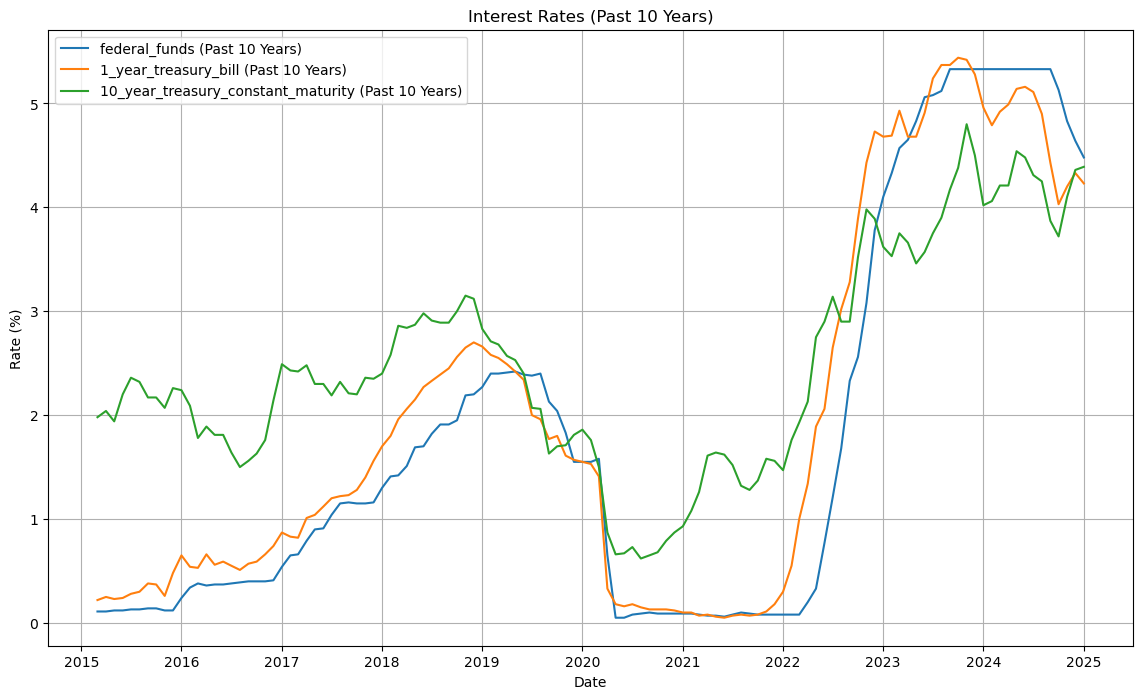

Barriers in the dataset:
Missing Values: Some dates might have missing values due to holidays or data collection issues.
Data Granularity: The data might be reported at different frequencies (daily, monthly), affecting consistency.
Data Accuracy: Potential errors in data recording or reporting could affect the reliability of the dataset.


In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# URLs for the different interest rates
urls = {
    "federal_funds": "https://fred.stlouisfed.org/data/FEDFUNDS.txt",
    "1_year_treasury_bill": "https://fred.stlouisfed.org/data/GS1.txt",
    "10_year_treasury_constant_maturity": "https://fred.stlouisfed.org/data/GS10.txt"
}

# Function to download and parse data
def download_data(url):
    response = requests.get(url)
    response.raise_for_status()
    soup = BeautifulSoup(response.content, 'html.parser')
    text_content = soup.get_text()
    lines = text_content.splitlines()
    data_lines = []
    start_collecting = False
    for line in lines:
        if line.startswith("DATE"):
            start_collecting = True
            continue
        if start_collecting and line.strip():
            data_lines.append(line)
    data = [line.split() for line in data_lines]
    flat_data = [item[0] for item in data]
    values = flat_data[0::2]
    dates = flat_data[1::2]
    df = pd.DataFrame({
        'Date': pd.to_datetime(dates, errors='coerce'),
        'Value': pd.to_numeric(values, errors='coerce')
    })
    return df

# Download data for each rate
data_frames = {}
for rate, url in urls.items():
    data_frames[rate] = download_data(url)

# Filter for the past 10 years from today
ten_years_ago = datetime.now() - pd.DateOffset(years=10)
recent_data = {rate: df[df['Date'] >= ten_years_ago] for rate, df in data_frames.items()}

# a) Descriptive statistics
for rate, df in recent_data.items():
    print(f"Descriptive Statistics for {rate}:")
    print(df['Value'].describe())
    print("\n")

# b) Visualizing plots
plt.figure(figsize=(14, 8))
for rate, df in recent_data.items():
    plt.plot(df['Date'], df['Value'], label=f'{rate} (Past 10 Years)')

plt.title('Interest Rates (Past 10 Years)')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# c) Barriers in the dataset
barriers = {
    "Missing Values": "Some dates might have missing values due to holidays or data collection issues.",
    "Data Granularity": "The data might be reported at different frequencies (daily, monthly), affecting consistency.",
    "Data Accuracy": "Potential errors in data recording or reporting could affect the reliability of the dataset."
}

print("Barriers in the dataset:")
for barrier, explanation in barriers.items():
    print(f"{barrier}: {explanation}")